# **1  Introduction**

**Definition and Purpose**

QSAR modeling is a computational technique that relates the chemical structure properties of compounds to their biological activities. By building a QSAR model, we can predict the bioactivity of new compounds based on their chemical structures.
<br><br>

**Descriptors** [1]

Chemical descriptors are fundamental to QSAR modeling, and numerous types of descriptors representing different levels of chemical structure have been suggested over time.

These levels range from the molecular formula (1D) to the widely used two-dimensional structural representation (2D), three-dimensional conformation-dependent structures (3D), and even higher levels that consider molecular orientation and time-dependent dynamics (4D and beyond).
<br><br>

**Application in Toxicology and Environmental Health** [2]

QSAR models are integral to advancing the fields of Toxicology and Environmental Health. QSAR models provide a robust framework for predicting and interpreting the biological activities of compounds. This predictive power is essential in drug design for developing safer and more effective therapeutics by understanding the molecular fundamentals of biological properties. QSAR models are also increasingly used in risk assessments to reduce reliance on animal testing, supporting regulatory and safety evaluations.

Overall, QSAR modeling offers a practical approach to evaluating chemical toxicity, providing insight into the molecular interactions and environmental behaviors of toxicants.
<br><br>

**Overview of QSAR Workflow** [3]

The developing of a QSAR model has four basic steps:

1.  **Data Preparation:** This step involves gathering a reliable dataset consisting of chemical structures and known biological activities or properties.  Care must be taken to ensure that the data are consistent and comparable, such as using the same experimental protocols across all compounds.

2.  **Descriptor Calculation:** After collecting the data, molecular structures are determined and molecular descriptors are calculated.  These descriptors numerically represent the chemical properties of the compounds, and various software packages are used to generate hundreds of descriptors.

3.  **Model Building:** The next step is to use mathematical or chemometric methods (e.g., multiple linear regression, principal component analysis, artificial neural networks) to build the QSAR model.  The method chosen correlates the descriptors with the biological activity or property of interest.

4.  **Model Validation and Testing:** The final step is to test and validate the model using independent test sets, which are not used in the model-building process.  This ensures the model's robustness and accuracy.  Validation involves calculating statistical measures like correlation coefficients to evaluate the model's predictive performance

# **2  Simple QSAR Model Example**

## **2.1 Data preparation**

**What is ChEMBL** [4]

ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It provides information on the biological activities of compounds, especially focusing on their interactions with various biological targets, such as proteins or receptors. ChEMBL is widely used in cheminformatics and drug discovery research for retrieving bioactivity data, such as half-maximal inhibitory concentration (IC50), binding affinity (Ki), and effective concentration (EC50), among others.
<br><br>

**Key Features of ChEMBL:**

Bioactivity Data: ChEMBL provides information on the bioactivity of small

1.  Molecules against biological targets. This data includes values like IC50, Ki, EC50, and more.

2.  Drug-Like Molecules: The database contains chemical compounds, including those that are drug-like, which have been tested in various assays and reported in the scientific literature.

3.  Biological Targets: ChEMBL provides data on the biological targets of the compounds, including proteins, enzymes, receptors, and more.

4.  Public and Open Access: ChEMBL is open-access and is maintained by the European Bioinformatics Institute (EMBL-EBI).
<br><br>

**Understanding Bioactivity Data in ChEMBL:**

* **IC50**: The half-maximal inhibitory concentration (IC50) is a measure of a compound's potency. It represents the concentration at which a compound inhibits a biological process by 50%. Lower IC50 values indicate higher potency.

* **pIC50**: The pIC50 is a logarithmic transformation of IC50 for easier comparison. It is calculated as:

$$pIC50 = -\log_{10}(\text{IC50 in molar units})$$
<br><br>

**ChEMBL User Guide Video**

-- EMBL-EBI Webinar A guide to exploring drug like compounds and their biological targets using ChEMBL: [https://www.youtube.com/watch?v=Yi8RllYseS8&t=648s]

A guide to accessing ChEMBL and UniChem through an API [https://www.youtube.com/watch?v=6GOU_7Doajw]


### Step 1: Install Reqired Libraries
First, install the necessary Python libraires

In [1]:
# Install necessary packages
!pip install -q chembl_webresource_client rdkit-pypi keras tensorflow matplotlib
import pandas as pd
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.0 MB/s eta 0:00:00


### Step 2: Retrieve Bioactivity Data from ChEMBL API

We can use the ChEMBL API to search for bioactivity data based on a target (e.g., EGFR). And then the target can be retrieved using the new_client.target search.

Here, we search for the EGFR target and retrieve IC50 values for bioactivities related to this target.

In [2]:
# Retrieve bioactivity data for target CHEMBL235
target = new_client.target
activity = new_client.activity

# Fetch bioactivity data for the target CHEMBL235
activities = activity.filter(target_chembl_id="CHEMBL235").filter(standard_type="IC50")

# Convert to pandas DataFrame
activity_df = pd.DataFrame(activities)

# Check the first few rows of the data
print(activity_df.head())

  action_type activity_comment  activity_id activity_properties  \
0        None             None       105368                  []   
1        None             None       108760                  []   
2        None             None       108770                  []   
3        None             None       108782                  []   
4        None             None       115395                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL759452  In vitro binding affinity against human peroxi...   
1    CHEMBL759452  In vitro binding affinity against human peroxi...   
2    CHEMBL759452  In vitro binding affinity against human peroxi...   
3    CHEMBL759452  In vitro binding affinity against human peroxi...   
4    CHEMBL759452  In vitro binding affinity against human peroxi...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1 

### Step 3: Data Processing

Now, we need to clean the dataset and convert IC50 values into pIC50 (which is the negative logarithm of the IC50 values). Additionally, we'll calculate molecular descriptors for the molecules using RDKit.

In [3]:
# Filter out rows where 'standard_value' is None or NaN
activity_df = activity_df[activity_df['standard_value'].notna()]

# Define a threshold for bioactivity classification (e.g., 1000 nM for IC50)
threshold = 1000  # threshold for bioactivity (nM)

# Convert 'standard_value' to float and apply the threshold for classification
activity_df['bioactivity_class'] = activity_df['standard_value'].apply(lambda x: 1 if float(x) < threshold else 0)

# Print the first few rows to check
print(activity_df.head())

  action_type activity_comment  activity_id activity_properties  \
0        None             None       105368                  []   
1        None             None       108760                  []   
2        None             None       108770                  []   
3        None             None       108782                  []   
4        None             None       115395                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL759452  In vitro binding affinity against human peroxi...   
1    CHEMBL759452  In vitro binding affinity against human peroxi...   
2    CHEMBL759452  In vitro binding affinity against human peroxi...   
3    CHEMBL759452  In vitro binding affinity against human peroxi...   
4    CHEMBL759452  In vitro binding affinity against human peroxi...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1 

<ipython-input-3-02394d104f79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['bioactivity_class'] = activity_df['standard_value'].apply(lambda x: 1 if float(x) < threshold else 0)


In [4]:
# Check label distribution
label_distribution = activity_df['bioactivity_class'].value_counts()

# Print the distribution of the labels
print(label_distribution)

# Optionally, display the percentage of each class
label_percentage = activity_df['bioactivity_class'].value_counts(normalize=True) * 100
print(label_percentage)

bioactivity_class
1    1269
0     892
Name: count, dtype: int64
bioactivity_class
1    58.722814
0    41.277186
Name: proportion, dtype: float64


## **2.2 Descriptors Calculation**

Molecular descriptors describe the structural and chemical properties of the molecules. We will use RDKit to compute them.

In [5]:
import numpy as np

# Extract SMILES strings and bioactivity labels
smiles_list = activity_df['canonical_smiles'].tolist()
labels = activity_df['bioactivity_class'].tolist()

# Generate Morgan fingerprints and store them as NumPy arrays
morgan_fps = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        arr = np.zeros((1,))                        # Initialize a NumPy array
        DataStructs.ConvertToNumpyArray(fp, arr)    # convert the computed fp to array
        morgan_fps.append(arr)                      # Add arr to our morgan_fps

# Convert the list of NumPy arrays to a DataFrame
X = pd.DataFrame(morgan_fps)
y = pd.Series(labels)

print(X.head())
print(y.head())

   0     1     2     3     4     5     6     7     8     9     ...  2038  \
0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2039  2040  2041  2042  2043  2044  2045  2046  2047  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2048 columns]
0    1
1    1
2    1
3    1
4    1
dtype: int64


## **2.3 Model Building**

### Step 1: Splitting the Data into Training and Test Sets

We now define the features (molecular descriptors) and the target variable (pIC50 values), then split the dataset into training and test sets.

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Building a QSAR Model

We can now using the neural network to build QSAR model

In [7]:
# Build a Neural Network Model for QSAR Classification
model = Sequential() # build the sequential model
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu')) # add the input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7182 - loss: 0.5483 - val_accuracy: 0.8406 - val_loss: 0.3795
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8862 - loss: 0.2813 - val_accuracy: 0.8499 - val_loss: 0.3426
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9119 - loss: 0.2143 - val_accuracy: 0.8499 - val_loss: 0.3236
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9285 - loss: 0.1782 - val_accuracy: 0.8314 - val_loss: 0.3885
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9574 - loss: 0.1161 - val_accuracy: 0.8568 - val_loss: 0.3895
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9448 - loss: 0.1262 - val_accuracy: 0.8499 - val_loss: 0.4554
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9622 - loss: 0.0970 - val_accuracy: 0.8453 - val_loss: 0.3992
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9643 - loss: 0.0954 - val_accuracy: 0.8591 - val_loss: 0.

## **2.4 Model Validation and Testing**

Finally, we evaluate the model by calculating the Mean Squared Error (MSE) and plotting the actual vs predicted pIC50 values.

In [8]:
# Evaluate the model
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test) # evaluate the trained model
print(f"Test accuracy: {accuracy * 100:.2f}%")

# After training and evaluating the model, let's predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classification (0 or 1)

# Step 1: Generate a Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 1.0825 
Test accuracy: 85.68%
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       174
           1       0.87      0.89      0.88       259

    accuracy                           0.86       433
   macro avg       0.85      0.85      0.85       433
weighted avg       0.86      0.86      0.86       433



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


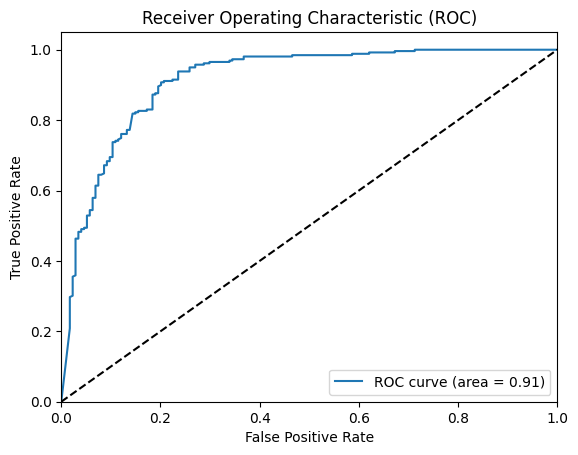

In [9]:
# Step 2: Calculate ROC Curve and AUC (Area Under the Curve)
y_pred_prob = model.predict(X_test).ravel()  # Predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **References**

[1] Cherkasov A, Muratov EN, Fourches D, et al. QSAR Modeling: Where Have You Been? Where Are You Going To? Journal of medicinal chemistry. 2014;57(12):4977-5010. doi:10.1021/jm4004285

[2] Schultz TW, Cronin MTD, Netzeva TI. The present status of QSAR in toxicology. Journal of molecular structure Theochem. 2003;622(1):23-38. doi:10.1016/S0166-1280(02)00615-2
  
[3] Vračko M. Chapter 10 - Mathematical (Structural) Descriptors in QSAR: Applications in Drug Design and Environmental Toxicology. In: Advances in Mathematical Chemistry and Applications. Elsevier Inc; 2015:222-250. doi:10.1016/B978-1-68108-198-4.50010-2

[4] Zdrazil B, Felix E, Hunter F, et al. The ChEMBL Database in 2023: a drug discovery platform spanning multiple bioactivity data types and time periods. Nucleic acids research. 2024;52(D1):D1180-D1192. doi:10.1093/nar/gkad1004

